In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

femtemp = pd.read_csv('femtemp.csv')
femact = pd.read_csv('femact.csv')
maletemp = pd.read_csv('maletemp.csv')
maleact = pd.read_csv('maleact.csv')
femtemp.index = range(len(femtemp))
femact.index = range(len(femact))
maletemp.index = range(len(maletemp))
maleact.index = range(len(maleact))

In [41]:
female = pd.merge(femtemp, femact, left_index=True, right_index=True, suffixes=("_temp", "_activity"))
male = pd.merge(maletemp, maleact, left_index=True, right_index=True, suffixes=("_temp", "_activity")) 
temp = pd.merge(femtemp, maletemp, left_index=True, right_index=True)
activity = pd.merge(femact, maleact, left_index=True, right_index=True)
df = pd.merge(female, male, left_index=True, right_index=True)
temp

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,37.11,37.91,36.85,38.20,37.54,37.04,37.41,36.35,37.47,37.99,...,36.48,37.10,36.16,36.85,36.08,36.86,36.68,36.41,36.93,37.00
1,37.13,37.98,36.78,38.19,37.55,37.06,37.46,36.41,37.53,37.99,...,36.44,37.10,36.05,36.91,36.11,36.84,36.71,36.38,36.83,37.06
2,37.19,37.98,36.76,38.14,37.55,37.09,37.56,36.50,37.53,37.96,...,36.37,37.23,35.95,36.93,36.12,36.89,36.72,36.33,36.76,37.06
3,37.20,37.96,36.72,37.95,37.54,37.11,37.74,36.55,37.46,37.93,...,36.27,37.33,35.80,37.00,36.10,36.84,36.69,36.27,36.72,37.01
4,37.22,37.95,36.64,37.80,37.53,37.09,37.73,36.63,37.51,37.87,...,36.63,37.36,35.80,37.06,36.18,36.84,36.62,36.22,36.67,36.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,36.93,37.16,36.45,37.05,37.59,37.38,37.54,36.92,36.64,37.33,...,37.00,37.38,37.00,35.96,37.00,36.38,37.02,35.78,36.68,37.00
20156,37.00,37.00,36.46,36.99,37.62,37.38,37.53,36.85,36.63,37.37,...,37.00,37.14,37.00,35.90,37.00,36.44,37.06,35.78,36.91,37.00
20157,37.08,37.10,36.48,36.96,37.67,37.40,37.47,36.85,36.65,37.33,...,37.00,37.21,37.00,35.84,37.00,36.42,37.09,35.82,37.05,37.00
20158,37.10,37.26,36.51,36.95,37.63,37.46,37.49,36.86,36.85,37.22,...,37.00,37.35,37.00,35.80,37.00,36.49,37.09,35.77,37.19,37.00


## Plot 1: Daytime vs Nighttime

In [42]:
lights = []
for i in range(0, len(temp), 1440):
    lights.extend(['Nighttime'] * 720 + ['Daytime'] * 720)
temp["lights"] = lights

temp["Female"] = temp.loc[:, "f1":"f13"].mean(axis=1)
temp["Male"] = temp.loc[:, "m1":"m13"].mean(axis=1)

In [43]:
temp

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,m7,m8,m9,m10,m11,m12,m13,lights,Female,Male
0,37.11,37.91,36.85,38.20,37.54,37.04,37.41,36.35,37.47,37.99,...,36.85,36.08,36.86,36.68,36.41,36.93,37.00,Nighttime,37.288462,36.501538
1,37.13,37.98,36.78,38.19,37.55,37.06,37.46,36.41,37.53,37.99,...,36.91,36.11,36.84,36.71,36.38,36.83,37.06,Nighttime,37.323077,36.488462
2,37.19,37.98,36.76,38.14,37.55,37.09,37.56,36.50,37.53,37.96,...,36.93,36.12,36.89,36.72,36.33,36.76,37.06,Nighttime,37.337692,36.493077
3,37.20,37.96,36.72,37.95,37.54,37.11,37.74,36.55,37.46,37.93,...,37.00,36.10,36.84,36.69,36.27,36.72,37.01,Nighttime,37.338462,36.490769
4,37.22,37.95,36.64,37.80,37.53,37.09,37.73,36.63,37.51,37.87,...,37.06,36.18,36.84,36.62,36.22,36.67,36.88,Nighttime,37.310769,36.530769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,36.93,37.16,36.45,37.05,37.59,37.38,37.54,36.92,36.64,37.33,...,35.96,37.00,36.38,37.02,35.78,36.68,37.00,Daytime,37.042308,36.592308
20156,37.00,37.00,36.46,36.99,37.62,37.38,37.53,36.85,36.63,37.37,...,35.90,37.00,36.44,37.06,35.78,36.91,37.00,Daytime,37.045385,36.618462
20157,37.08,37.10,36.48,36.96,37.67,37.40,37.47,36.85,36.65,37.33,...,35.84,37.00,36.42,37.09,35.82,37.05,37.00,Daytime,37.070769,36.638462
20158,37.10,37.26,36.51,36.95,37.63,37.46,37.49,36.86,36.85,37.22,...,35.80,37.00,36.49,37.09,35.77,37.19,37.00,Daytime,37.116154,36.656154


In [44]:
lights_temp = temp.groupby('lights').mean().reset_index()
lights_temp
lights_temp = lights_temp.melt(id_vars=["lights"], var_name="Mouse ID", value_name="Temperature (C)")
lights_temp

,lights,Mouse ID,Temperature (C)
0,Daytime,f1,36.775258
1,Nighttime,f1,37.998793
2,Daytime,f2,36.949431
3,Nighttime,f2,37.720151
4,Daytime,f3,36.667866
5,Nighttime,f3,37.427633
6,Daytime,f4,36.802228
7,Nighttime,f4,37.880967
8,Daytime,f5,37.166470
9,Nighttime,f5,38.357747


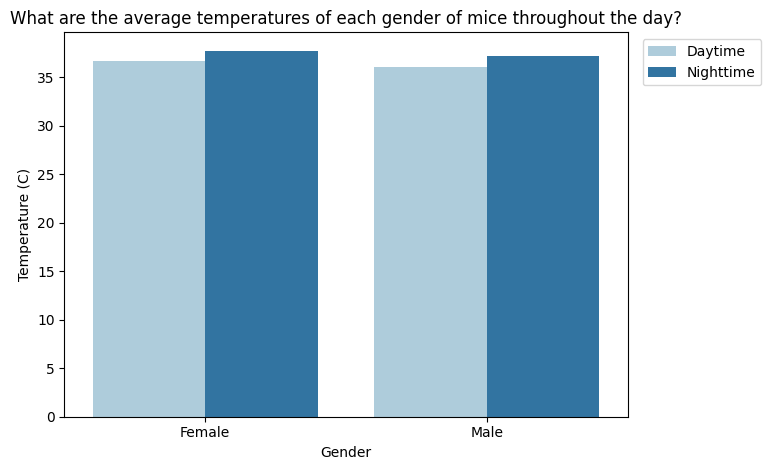

In [ ]:
sns.barplot(data=lights_temp.iloc[52:], x='Mouse ID', y='Temperature (C)', hue='lights', palette='Paired')
plt.title('What are the average temperatures of each gender of mice throughout the day?')
plt.xlabel('Gender')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')

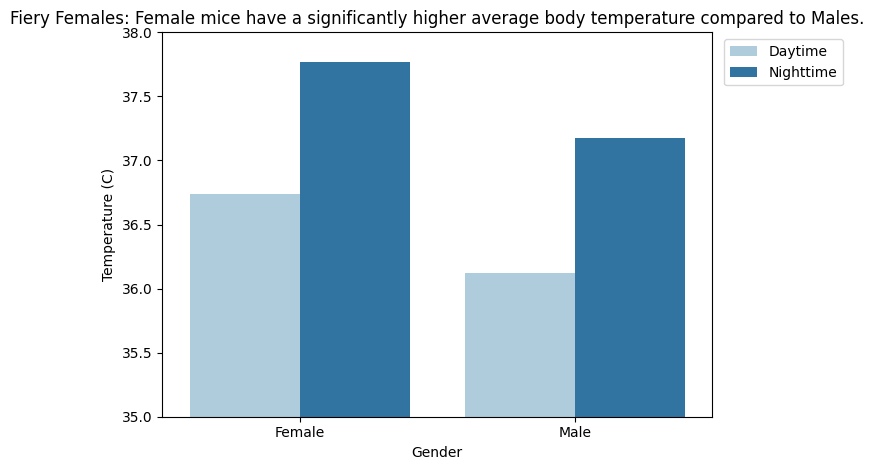

In [59]:
sns.barplot(data=lights_temp.iloc[52:], x='Mouse ID', y='Temperature (C)', hue='lights', palette='Paired')
plt.title('Fiery Females: Female mice have a significantly higher average body temperature compared to Males.')
plt.xlabel('Gender')
plt.ylim(35, 38) 
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')

In [52]:
activity

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,25.0,62.0,0.0,61.0,0.0,10.0,31.0,7.0,76.0,33.0,...,39.0,3.0,0.0,1.0,13.0,24.0,0.0,0.0,0.0,0.0
1,26.0,28.0,4.0,53.0,0.0,35.0,11.0,0.0,39.0,82.0,...,70.0,38.0,24.0,0.0,6.0,74.0,0.0,0.0,6.0,0.0
2,35.0,40.0,5.0,23.0,0.0,42.0,38.0,0.0,41.0,60.0,...,1.0,0.0,6.0,17.0,22.0,7.0,9.0,0.0,0.0,0.0
3,63.0,7.0,2.0,43.0,0.0,0.0,23.0,43.0,83.0,8.0,...,56.0,18.0,14.0,26.0,24.0,32.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,38.0,3.0,0.0,21.0,0.0,30.0,0.0,...,101.0,55.0,68.0,21.0,0.0,57.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,0.0,27.0,0.0,0.0,76.0,0.0,45.0,0.0,3.0,42.0,...,0.0,78.0,0.0,0.0,0.0,55.0,75.0,24.0,71.0,0.0
20156,0.0,29.0,0.0,0.0,11.0,49.0,37.0,0.0,2.0,58.0,...,0.0,51.0,0.0,0.0,0.0,49.0,57.0,49.0,52.0,0.0
20157,3.0,66.0,0.0,7.0,14.0,28.0,3.0,0.0,17.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,18.0,0.0,75.0,0.0
20158,25.0,87.0,0.0,0.0,6.0,33.0,53.0,0.0,23.0,4.0,...,0.0,92.0,0.0,0.0,0.0,27.0,0.0,0.0,60.0,0.0


In [53]:
activity["lights"] = lights

activity["Female"] = activity.loc[:, "f1":"f13"].mean(axis=1)
activity["Male"] = activity.loc[:, "m1":"m13"].mean(axis=1)
activity

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,m7,m8,m9,m10,m11,m12,m13,lights,Female,Male
0,25.0,62.0,0.0,61.0,0.0,10.0,31.0,7.0,76.0,33.0,...,1.0,13.0,24.0,0.0,0.0,0.0,0.0,Nighttime,24.230769,11.230769
1,26.0,28.0,4.0,53.0,0.0,35.0,11.0,0.0,39.0,82.0,...,0.0,6.0,74.0,0.0,0.0,6.0,0.0,Nighttime,22.461538,19.076923
2,35.0,40.0,5.0,23.0,0.0,42.0,38.0,0.0,41.0,60.0,...,17.0,22.0,7.0,9.0,0.0,0.0,0.0,Nighttime,24.384615,6.769231
3,63.0,7.0,2.0,43.0,0.0,0.0,23.0,43.0,83.0,8.0,...,26.0,24.0,32.0,0.0,0.0,0.0,0.0,Nighttime,22.076923,14.538462
4,0.0,0.0,0.0,38.0,3.0,0.0,21.0,0.0,30.0,0.0,...,21.0,0.0,57.0,0.0,0.0,0.0,0.0,Nighttime,9.153846,27.307692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,0.0,27.0,0.0,0.0,76.0,0.0,45.0,0.0,3.0,42.0,...,0.0,0.0,55.0,75.0,24.0,71.0,0.0,Daytime,19.769231,29.230769
20156,0.0,29.0,0.0,0.0,11.0,49.0,37.0,0.0,2.0,58.0,...,0.0,0.0,49.0,57.0,49.0,52.0,0.0,Daytime,19.615385,27.692308
20157,3.0,66.0,0.0,7.0,14.0,28.0,3.0,0.0,17.0,0.0,...,0.0,0.0,4.0,18.0,0.0,75.0,0.0,Daytime,14.153846,10.692308
20158,25.0,87.0,0.0,0.0,6.0,33.0,53.0,0.0,23.0,4.0,...,0.0,0.0,27.0,0.0,0.0,60.0,0.0,Daytime,19.615385,14.615385


In [55]:
lights_activity = activity.groupby('lights').mean().reset_index()
lights_activity
lights_activity = lights_activity.melt(id_vars=["lights"], var_name="Mouse ID", value_name="Activity")
lights_activity

,lights,Mouse ID,Activity
0,Daytime,f1,8.372123
1,Nighttime,f1,23.921718
2,Daytime,f2,15.186093
3,Nighttime,f2,38.058632
4,Daytime,f3,11.116057
5,Nighttime,f3,19.975690
6,Daytime,f4,10.420695
7,Nighttime,f4,31.605259
8,Daytime,f5,10.754581
9,Nighttime,f5,41.069566


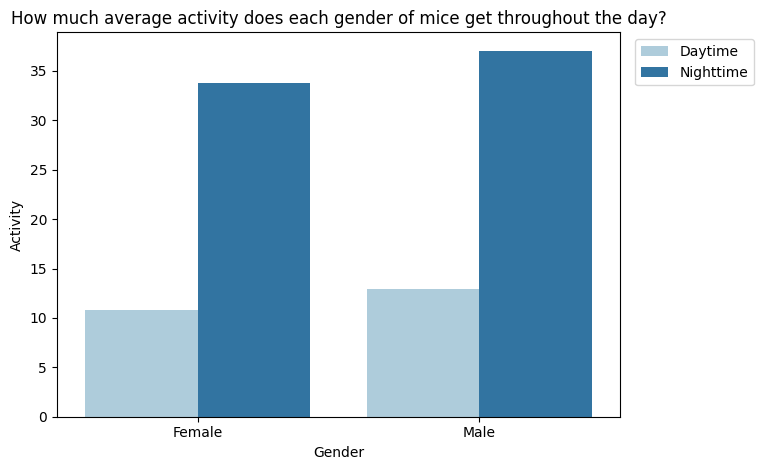

In [60]:
sns.barplot(data=lights_activity.iloc[52:], x='Mouse ID', y='Activity', hue='lights', palette='Paired')
plt.title('How much average activity does each gender of mice get throughout the day?')
plt.xlabel('Gender')
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')

In [61]:
activity_day = lights_activity[lights_activity['lights'] == 'Daytime']
activity_day

,lights,Mouse ID,Activity
0,Daytime,f1,8.372123
2,Daytime,f2,15.186093
4,Daytime,f3,11.116057
6,Daytime,f4,10.420695
8,Daytime,f5,10.754581
10,Daytime,f6,10.356864
12,Daytime,f7,7.208588
14,Daytime,f8,9.678869
16,Daytime,f9,17.324218
18,Daytime,f10,11.263294


C:\Users\ne5ye\AppData\Local\Temp\ipykernel_9092\2396917921.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=activity_day.iloc[26:], x='Mouse ID', y='Activity', palette='husl')


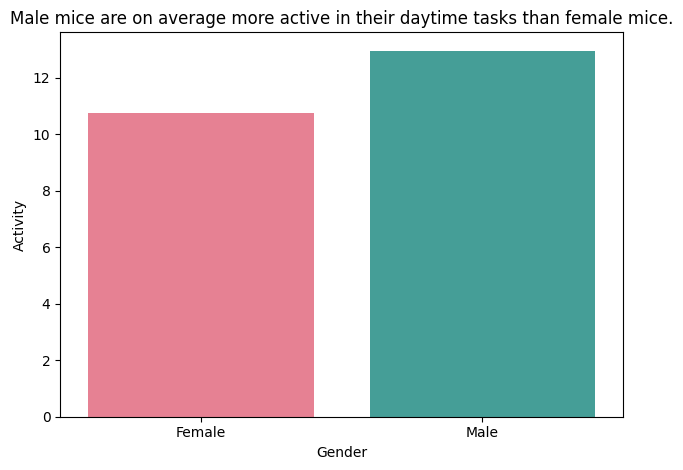

In [76]:
sns.barplot(data=activity_day.iloc[26:], x='Mouse ID', y='Activity', palette='husl')
plt.title('Male mice are on average more active in their daytime tasks than female mice.')
plt.xlabel('Gender')
plt.tight_layout()